<a href="https://colab.research.google.com/github/JChengecha/cookie-recipe/blob/master/Joseph_Chengecha_Core_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # **Financial Inclusion in Kenya, Rwanda, Tanzania and Uganda**





Financial Inclusion remains one of the main obstacles to economic and human development in Africa. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### Defining the Question

The Data Analytic Question:

*  To develop a model that would predict financial inclusion in Kenya, Rwanda, 
Tanzania and Uganda based on the various characteristics.






Metric for Success:

To develop a linear discriminant model that would predict if an individual would have an bank account based on his/her features






the context:

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion.

The Experimental Design

* collecting data
* perform data cleaning procedures and deal with anomalies
* perform exploratory data analysis


Data Relevance

data should be from the four countries showing their access to a bank account and varianbles to best describe the responders standards of living

## *Exploratory Data Analysis*

### Importing libraries and loading the dataset

In [83]:
# importing libraries necessary for the EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# loading the dataset into the notebook from this url: http://bit.ly/FinancialDataset
fdata=pd.read_csv('http://bit.ly/FinancialDataset')

Previewing the dataset and checking on information concerning the dataset

In [85]:
#checking the top rows of the data
fdata.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [86]:
#checking the bottom rows of the dataset
fdata.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [87]:
#getting the information concerning the dataset
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


### Data cleaning

In [88]:
# renaming the column names and setting to lower case letters
fdata.rename(columns={'Has a Bank account':'has_bank_account','Type of Location':'location_type',
                      'Cell Phone Access':'cell_phone_access','Respondent Age':'responders_age',
                      'The relathip with head':'relationship_with_head','Level of Educuation':'level_of_education',
                      'Type of Job':'type_of_job'},inplace=True)
fdata.columns.str.lower

<bound method _noarg_wrapper.<locals>.wrapper of <pandas.core.strings.StringMethods object at 0x7fd291644b50>>

### checking for null values

In [89]:
#checking for null values
fdata.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_bank_account          36
location_type             15
cell_phone_access         11
household_size            28
responders_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of_education        29
type_of_job               30
dtype: int64

In [90]:
#filling the null values for the household size variable and responders age variable withe the mean of their respective columns
fdata.household_size=fdata['household_size'].fillna(value=fdata['household_size'].mean())
fdata.responders_age=fdata['responders_age'].fillna(value=fdata['responders_age'].mean())

In [91]:
#dropping the rest of the null values
fdata=fdata.dropna()

In [92]:
#checking if there are any null values
fdata.isnull().sum()
#there are no further null values

country                   0
year                      0
uniqueid                  0
has_bank_account          0
location_type             0
cell_phone_access         0
household_size            0
responders_age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
level_of_education        0
type_of_job               0
dtype: int64

### checking for duplicates

In [93]:
fdata.duplicated().sum()
#there are no duplicates

0

In [94]:
fdata.head(5)

,country,year,uniqueid,has_bank_account,location_type,cell_phone_access,household_size,responders_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# univariate analysis


In [95]:
fdata.columns

Index(['country', 'year', 'uniqueid', 'has_bank_account', 'location_type',
       'cell_phone_access', 'household_size', 'responders_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

### Frequency tables

In [96]:
#frequency table on the countries
fdata.country.value_counts()
#Rwanda has most entries

Rwanda      8701
Tanzania    6517
Kenya       6064
Uganda      2101
Name: country, dtype: int64

In [97]:
#frequency table on the type of jobs
fdata.type_of_job.value_counts()

Self employed                   6375
Informally employed             5562
Farming and Fishing             5428
Remittance Dependent            2511
Other Income                    1079
Formally employed Private       1049
No Income                        621
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: type_of_job, dtype: int64

In [98]:
#frequency table on the level of education attained
fdata.level_of_education.value_counts()

Primary education                  12711
No formal education                 4476
Secondary education                 4211
Tertiary education                  1149
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: level_of_education, dtype: int64

### Histograms


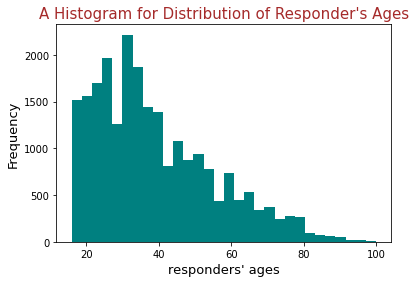

In [99]:
# Plotting a histogram for the responders age
plt.hist(fdata.responders_age,bins=30,color='teal')
plt.xlabel("responders' ages", fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.title("A Histogram for Distribution of Responder's Ages",fontsize=15,color='brown')
plt.show()

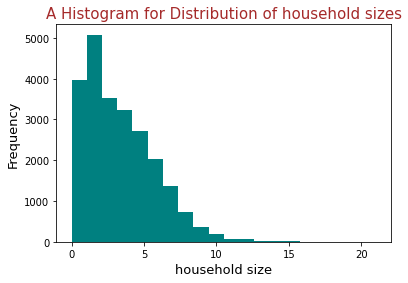

In [100]:
# a histogram for the house hold sizes
plt.hist(fdata.household_size,bins=20,color='teal')
plt.xlabel("household size", fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.title('A Histogram for Distribution of household sizes',fontsize=15,color='brown')
plt.show()

### Pie Chart

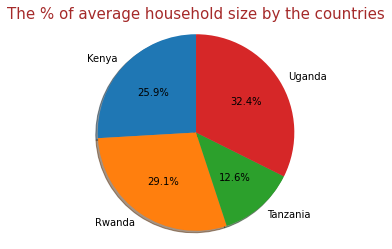

In [101]:
# computing for a pie chart
housesize=fdata.groupby(fdata.country,as_index=False)['household_size'].mean()
plt.pie(housesize.household_size, labels=housesize.country,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('The % of average household size by the countries',fontsize=15,color='brown')
plt.axis('equal',)
plt.show()

In [102]:
#getting the summary statistics for the dataset.(numerical columns)
fdata[['household_size','responders_age']].describe()

# Note on average a household had an average of 4 members(rounded up) and the average age of  the responders was 39 years

,household_size,responders_age
count,23383.000000,23383.000000
mean,3.688478,38.803202
std,2.280123,16.515560
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


To verify

as of 2014 the average persons per household in Kenya(as an East African Country) was 4 persons per household

In [103]:
#checking on the skew
print(fdata['household_size'].skew())
print(fdata['responders_age'].skew())

# both columns are positively skewed since the values are positive
# therefore they are skewed to the right and if the distributions are
# plotted, the tail on the right-hand side are longer than on the left 

0.9747219970454781
0.8421293556879087


In [104]:
#checking on kurtosis
print(fdata['household_size'].kurt())
print(fdata['responders_age'].kurt())

# both the kurtosis for both variables are greater than 0. 
# the distributions have heavier tails and are thus leptokurtic distributions

1.157022364387096
0.104461837582694


### Boxplots


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'boxplot of average household size ')

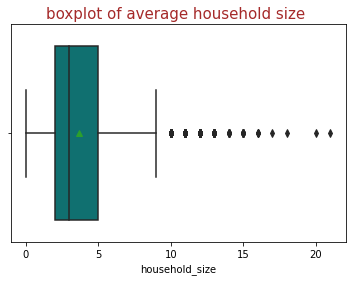

In [105]:
# plotting a boxplot on the household size 
sns.boxplot(fdata['household_size'],color='teal',showmeans=True)
plt.title('boxplot of average household size ',fontsize=15,color='brown')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'boxplot of years')

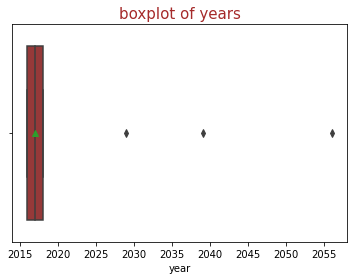

In [106]:
# plotting a boxplot for distribution of year
sns.boxplot(fdata['year'],color='brown',showmeans=True)
plt.title('boxplot of years',fontsize=15,color='brown')

### dealing with some of the anomalies

In [107]:
#removing rows whose year is greater than 2018
fdata=fdata[fdata['year']<=2018]

In [108]:
#change the category for '6' to 'Other/Dont know/RTA'
education={'level_of_education':{6:'Other/Dont know/RTA'}}
fdata.replace(education,inplace=True)

In [109]:
#removing extreme outliers for household size such that a house hold does not exceed 20 members
fdata=fdata[fdata['household_size']<=20]

# Bivariate analysis

In [110]:
fdata.columns

Index(['country', 'year', 'uniqueid', 'has_bank_account', 'location_type',
       'cell_phone_access', 'household_size', 'responders_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

### scatter plot

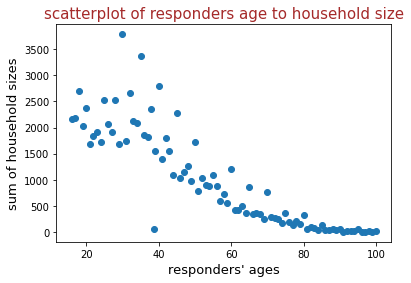

In [111]:
#scatter plot
age=fdata.groupby(fdata.responders_age,as_index=False)['household_size'].sum()
plt.scatter(age.responders_age,age.household_size)
plt.title('scatterplot of responders age to household size',fontsize=15,color='brown')
plt.xlabel("responders' ages", fontsize=13)
plt.ylabel('sum of household sizes',fontsize=13)
plt.show()

### checking correlation

In [112]:
#correlation
fdata[['household_size','responders_age']].corr()

,household_size,responders_age
household_size,1.000000,-0.120101
responders_age,-0.120101,1.000000


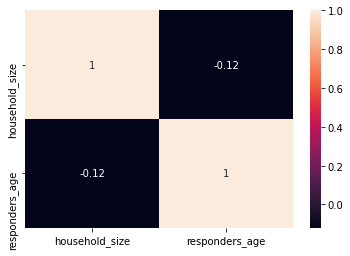

In [113]:
#visualising the correlations using a heat map
sns.heatmap(fdata[['household_size','responders_age']].corr(),annot=True)
plt.show()

stacked bar graph

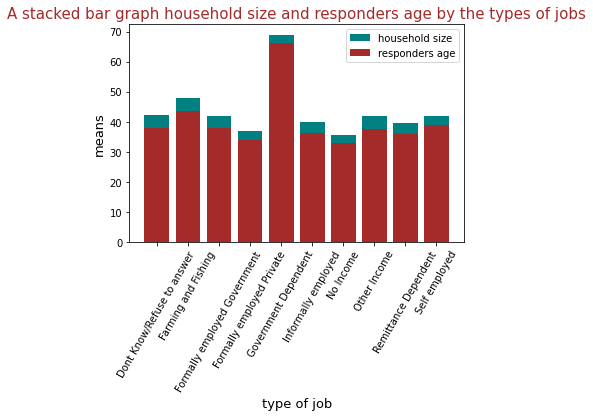

In [114]:
# plotting a stacked bar graph household size and responders age based on types of jobs
job_size=fdata.groupby(fdata.type_of_job,as_index=False)['household_size'].mean()
job_age=fdata.groupby(fdata.type_of_job,as_index=False)['responders_age'].mean()

plt.bar(job_size.type_of_job,job_size.household_size,label='household size',color='teal',bottom=job_age.responders_age)
plt.bar(job_age.type_of_job,job_age.responders_age,label='responders age',color='brown')
plt.title('A stacked bar graph household size and responders age by the types of jobs',fontsize=15,color='brown')
plt.xlabel("type of job", fontsize=13)
plt.ylabel('means',fontsize=13)
plt.xticks(rotation=60)
plt.legend()
plt.show()

### line graph

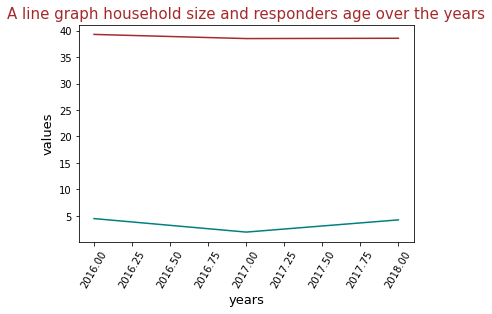

In [115]:
#plotting a line graph for responders age and house hold sizes over the years
year_size=fdata.groupby(fdata.year,as_index=False)['household_size'].mean()
year_age=fdata.groupby(fdata.year,as_index=False)['responders_age'].mean()
plt.plot(year_age.year,year_size.household_size,color='teal')
plt.plot(year_age.year,year_age.responders_age,color='brown')
plt.title('A line graph household size and responders age over the years',fontsize=15,color='brown')
plt.xlabel("years", fontsize=13)
plt.ylabel('values',fontsize=13)
plt.xticks(rotation=60)
plt.show()

# multivariate analysis

In [116]:
fdata.columns

Index(['country', 'year', 'uniqueid', 'has_bank_account', 'location_type',
       'cell_phone_access', 'household_size', 'responders_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [117]:
#in order for the multivariate analysis to work,the caategoriacal variables had to be encoded to numeric
#Therefore for ordinal data, a range of 1-10 was used. while for nominal data binary (0, 1) was used. Then converted to integers
country = {'country':{'Kenya': 1, 'Rwanda':2,'Tanzania':3,'Uganda':4}}
fdata.replace(country, inplace=True)

location={'location_type':{'Urban': 0, 'Rural':1}}
fdata.replace(location, inplace=True)

cellphone={'cell_phone_access':{'No': 0, 'Yes':1}}
fdata.replace(cellphone,inplace=True)

gender={'gender_of_respondent':{'Female': 0, 'Male':1}}
fdata.replace(gender,inplace=True)

relationship={'relationship_with_head':{'Spouse': 1, 'Head of Household':2, 'Other relative':3, 'Child':4, 'Parent':5, 'Other non-relatives':6}}
fdata.replace(relationship,inplace=True)

marital={'marital_status':{'Married/Living together': 1, 'Widowed':2,'Single/Never Married':3,'Divorced/Seperated':4,'Dont know':5}}
fdata.replace(marital,inplace=True)

education={'level_of_education':{'Secondary education':3, 'No formal education':1,'Vocational/Specialised training':5, 'Primary education':2,'Tertiary education':4, 'Other/Dont know/RTA':6,}}
fdata.replace(education,inplace=True)

jobtype={'type_of_job':{'Self employed':1, 'Government Dependent':2,'Formally employed Private':3, 'Informally employed':4,'Formally employed Government':5, 'Farming and Fishing':6,'Remittance Dependent':7, 'Other Income':8,'Dont Know/Refuse to answer':9, 'No Income':10}}
fdata.replace(jobtype,inplace=True)

fdata[['country', 'year', 'location_type','cell_phone_access','gender_of_respondent', 'relationship_with_head', 'marital_status','level_of_education', 'type_of_job']]=fdata[['country', 'year', 'location_type','cell_phone_access','gender_of_respondent', 'relationship_with_head', 'marital_status','level_of_education', 'type_of_job']].astype('int')

In [118]:
fdata.head(10)

,country,year,uniqueid,has_bank_account,location_type,cell_phone_access,household_size,responders_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,1,2018,uniqueid_1,Yes,1,1,3.0,24.0,0,1,1,3,1
1,1,2018,uniqueid_2,No,1,0,5.0,70.0,0,2,2,1,2
2,1,2018,uniqueid_3,Yes,0,1,5.0,26.0,1,3,3,5,1
3,1,2018,uniqueid_4,No,1,1,5.0,34.0,0,2,1,2,3
4,1,2018,uniqueid_5,No,0,0,8.0,26.0,1,4,3,2,4
5,1,2018,uniqueid_6,No,1,0,7.0,26.0,0,1,1,2,4
6,1,2018,uniqueid_7,No,1,1,7.0,32.0,0,1,1,2,1
7,1,2018,uniqueid_8,No,1,1,1.0,42.0,0,2,1,4,5
8,1,2018,uniqueid_9,Yes,1,1,3.0,54.0,1,2,1,3,6
9,1,2018,uniqueid_10,No,0,1,3.0,76.0,0,2,4,1,7


### Applying Linear Discriminant Analysis

In [119]:
# dividing data into labels and feature set
x = fdata.drop(columns=['uniqueid','has_bank_account'],axis=1)
y = fdata.iloc[:, 3].values

In [120]:
# The following code divides data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [121]:
#We then perform feature scaling.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [122]:
# Peforming LDA
# we then execute the fit and transform methods to actually retrieve the linear discriminants.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [123]:
#Training and Making Predictions
# We use the random forest classifier to evaluate the performance of a PCA-reduced algorithm
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [124]:
# we then evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3851  161]
 [ 446  218]]
Accuracy0.8701881950384944


insights on making improvements


* Inorder to revaluate the model, cheking using the Principle Component Analysis method for Multivariate Analysis is commendable
 